In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC


## 1.1 Signal decomposition

Generating the three time series

In [2]:
TIMESTEPS = 300
f_1 = []
f_2 = []
f_3 = []
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_1.append(np.sin(t) + 0.001*noise)
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_2.append(2*(t-np.floor(t)) + 0.002*noise)
for t in range(TIMESTEPS):
    noise = np.random.normal(t, 1)
    f_3.append(0.01*t + 0.001*noise)

Generate random matrix

In [3]:
A = np.random.rand(3,3)

Compute transformed values

In [4]:
S = np.c_[f_1, f_2, f_3]
X = np.dot(S, A)

Using PCA and ICA

In [5]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X)

ica = FastICA(n_components=3)
ica_data = ica.fit_transform(X)


c:\Users\Valton\miniconda3\envs\machine_learning\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


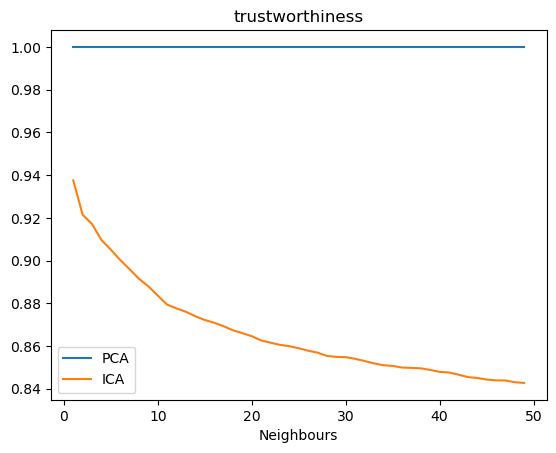

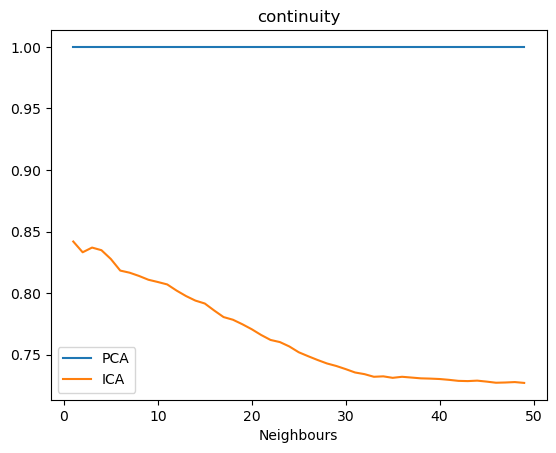

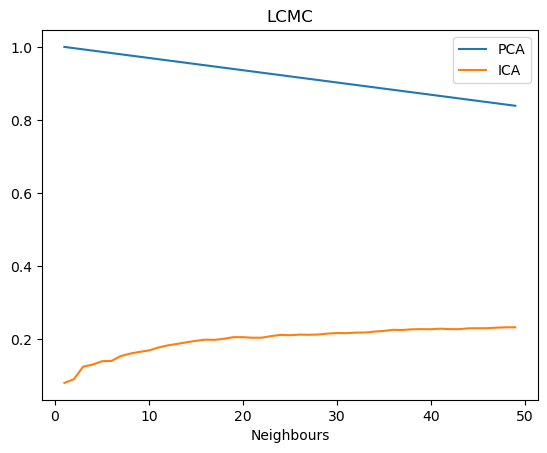

In [6]:

MAX_K = 50
Q = coranking.coranking_matrix(X, pca_data)
Q1 = coranking.coranking_matrix(X, ica_data)
# PCA
trust_pca = trustworthiness(Q, min_k=1, max_k=MAX_K)
cont_pca = continuity(Q, min_k=1, max_k=MAX_K)
lcmc_pca = LCMC(Q, min_k=1, max_k=MAX_K)
# ICA
trust_ica = trustworthiness(Q1, min_k=1, max_k=MAX_K)
cont_ica = continuity(Q1, min_k=1, max_k=MAX_K)
lcmc_ica = LCMC(Q1, min_k=1, max_k=MAX_K)

plt.plot(range(1,MAX_K), trust_pca, label='PCA')
plt.plot(range(1,MAX_K), trust_ica, label='ICA')
plt.title('trustworthiness')
plt.xlabel('Neighbours')
plt.legend()
plt.show()

plt.plot(range(1,MAX_K), cont_pca, label='PCA')
plt.plot(range(1,MAX_K), cont_ica, label='ICA')
plt.title('continuity')
plt.xlabel('Neighbours')
plt.legend()
plt.show()

plt.plot(range(1,MAX_K), lcmc_pca, label='PCA')
plt.plot(range(1,MAX_K), lcmc_ica, label='ICA')
plt.title('LCMC')
plt.xlabel('Neighbours')
plt.legend()
plt.show()


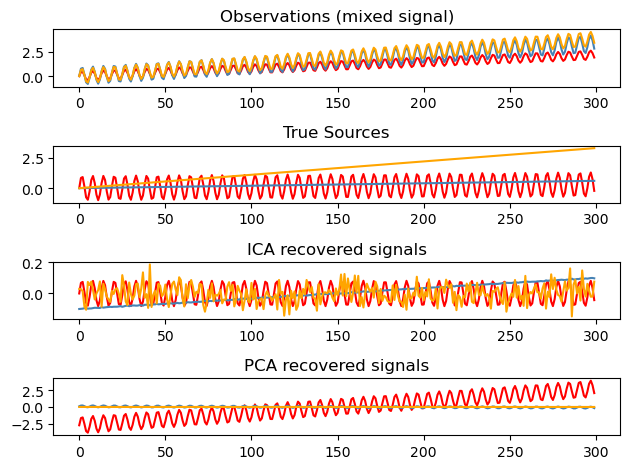

In [7]:
plt.figure()

models = [X, S, ica_data, pca_data]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

### Sources
https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py


https://coranking.readthedocs.io/en/latest/index.html#api-reference